In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv("euro-daily-hist_1999_2022.csv")
df=df[['Period\\Unit:','[Indian rupee ]']]
df.rename(columns={'Period\\Unit:':"Period",'[Indian rupee ]':"Indian rupee"},inplace=True)

In [4]:
df.dropna(inplace=True) 
df.replace('-',None, inplace=True)
df['Indian rupee']=df['Indian rupee'].astype(float)
df.interpolate()
df['Period'] = pd.to_datetime(df['Period'])
df = df.loc[::-1].reset_index(drop=True)
#df.set_index('Period', inplace=True)

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Indian rupee'].dropna())

(-1.1561172846975165,
 0.6921825557674872,
 10,
 5971,
 {'1%': -3.4314456478784714,
  '5%': -2.8620241752163804,
  '10%': -2.567027724073097},
 6023.398752037465)

In [6]:
df = df.copy(deep=True)
df['firstDiff']=df['Indian rupee'].diff()
print(df)

         Period  Indian rupee  firstDiff
0    2000-01-13       44.7240        NaN
1    2000-01-14       44.4730    -0.2510
2    2000-01-17       43.9790    -0.4940
3    2000-01-18       43.9980     0.0190
4    2000-01-19       44.0060     0.0080
...         ...           ...        ...
6038 2023-05-22       89.6710     0.2495
6039 2023-05-23       89.2675    -0.4035
6040 2023-05-24       89.1473    -0.1202
6041 2023-05-25       88.8055    -0.3418
6042 2023-05-26       88.8049    -0.0006

[6043 rows x 3 columns]


In [7]:

result = adfuller(df['firstDiff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -26.335123
p-value: 0.000000


<Axes: ylabel='firstDiff'>

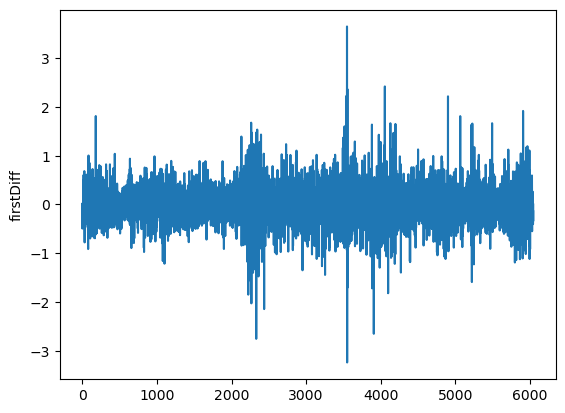

In [8]:
#sns.lineplot(x=df.index,y=df['Indian rupee'])
sns.lineplot(x=df.index,y=df['firstDiff'])

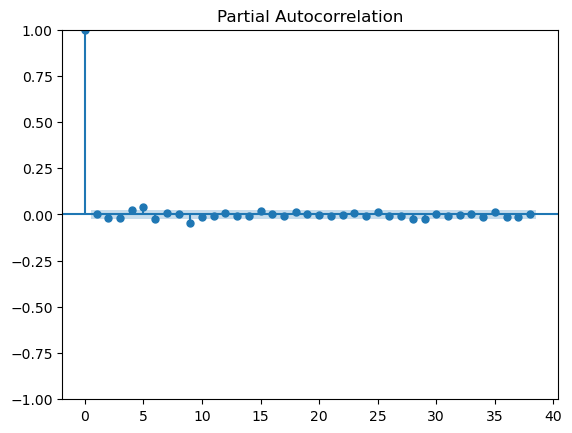

In [9]:
plot_pacf(df['firstDiff'].dropna())
plt.show()

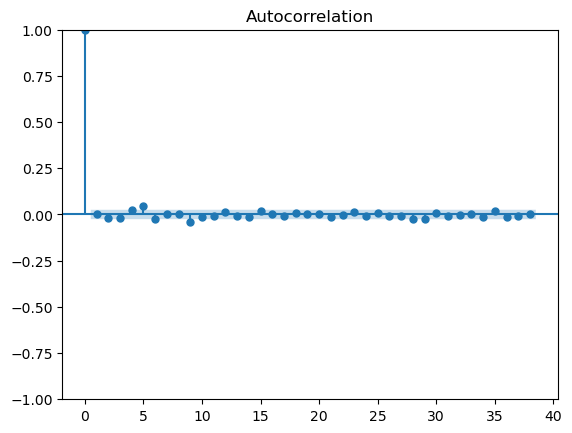

In [10]:
plot_acf(df['firstDiff'].dropna())
plt.show()

In [11]:
train = df[:round(len(df)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends
train.info()


         Period  Indian rupee  firstDiff
4225 2016-04-25       75.0190     0.0765
4226 2016-04-26       75.1373     0.1183
4227 2016-04-27       75.1273    -0.0100
4228 2016-04-28       75.5310     0.4037
4229 2016-04-29       75.6985     0.1675
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Period        4230 non-null   datetime64[ns]
 1   Indian rupee  4169 non-null   float64       
 2   firstDiff     4128 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 99.3 KB


In [12]:
test = df[round(len(df)*70/100):] # Take the last 70% data
print(test.head()) # Just to check where it ends

         Period  Indian rupee  firstDiff
4230 2016-05-02       76.3185     0.6200
4231 2016-05-03       76.8128     0.4943
4232 2016-05-04       76.6110    -0.2018
4233 2016-05-05       76.0745    -0.5365
4234 2016-05-06       76.1410     0.0665


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 4230 to 6042
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Period        1813 non-null   datetime64[ns]
 1   Indian rupee  1813 non-null   float64       
 2   firstDiff     1813 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 42.6 KB


In [21]:

model = ARIMA(train['Indian rupee'],order=(5,1,5)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict()
df['arimaPred'] = prediction
print(df.tail())

         Period  Indian rupee  firstDiff  arimaPred
6038 2023-05-22       89.6710     0.2495        NaN
6039 2023-05-23       89.2675    -0.4035        NaN
6040 2023-05-24       89.1473    -0.1202        NaN
6041 2023-05-25       88.8055    -0.3418        NaN
6042 2023-05-26       88.8049    -0.0006        NaN


/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


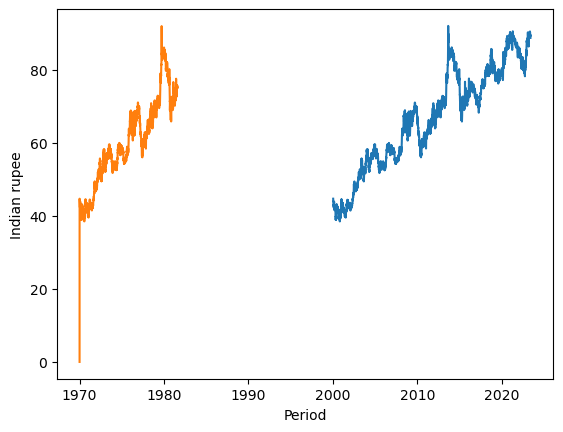

In [22]:
sns.lineplot(data=df,x='Period',y='Indian rupee')
sns.lineplot(data=df,x=df.index,y='arimaPred')
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Indian rupee'],order=(2,1,2),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
test['sarimaxPred'] = prediction
print(df.tail())
# Data looks better

NameError: name 'train' is not defined

In [ ]:
history = [x for x in train['Indian rupee']]
predictions = list()

for t in range(len(test)):    
    model = ARIMA(history, order=(5,1,5))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predictions.append(yhat)    # Append test observation into overall record
    obs = test['Indian rupee'][t]
    history.append(obs)

/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: 0

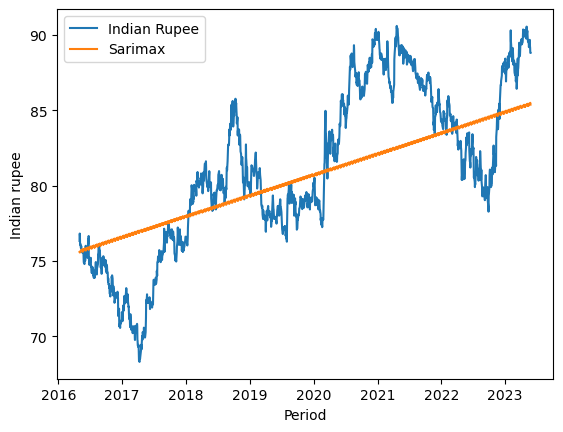

In [ ]:
df.dropna(inplace=True)

sns.lineplot(data=df,x=df['Period'],y='Indian rupee',label='Indian Rupee')
#sns.lineplot(data=df,x=df.index,y='sarimaxPred',label='')
#sns.lineplot(data=test,x=df.index,y='arimaPred',label='Aima')
sns.lineplot(data=test,x=test['Period'],y='sarimaxPred',label='Sarimax')
plt.legend()
plt.show()